In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# Function to add users and friendships to the graph
def add_user(user_id, username):
    G.add_node(user_id, username=username, type="user")

def add_friendship(user1_id, user2_id):
    G.add_edge(user1_id, user2_id)

In [3]:
interests = ["Bouffe de Clébard", "Shitfood", "Reste de frigo", "other"]

foodOrigins = ["US", "UK", "Greg", "Asia", "other"]

Spiciness = [0, 1, 2, 3]

users = [
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "David"),
    (5, "Eve")
]

friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

In [7]:
# Create an empty graph
G = nx.Graph()



# Add interests as nodes to the graph
for interest in interests:
    G.add_node(interest, type="interest")

# Connect users to their interests (based on your example data)
G.add_edge(1, "Photography")
G.add_edge(2, "Photography")
G.add_edge(2, "Music")
G.add_edge(3, "Travel")
G.add_edge(4, "Music")
G.add_edge(5, "Music")
G.add_edge(5, "Photography")



friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

# Add users and friendships to the graph
for user_id, username in users:
    add_user(user_id, username)

for user1_id, user2_id in friendships:
    add_friendship(user1_id, user2_id)

# Simple recommendation algorithm
def simple_recommendation(user_id):
    recommendations = []
    user_friends = set(G.neighbors(user_id))
    user_interests = set(G.neighbors(user_id))
    for friend in user_friends:
        friend_friends = set(G.neighbors(friend))
        shared_friends = user_friends.intersection(friend_friends)
        if len(shared_friends) > 0 and friend != user_id:  # Skip recommending the user itself
            recommendations.append(friend)
    return recommendations

# Draw the graph
pos = nx.spring_layout(G)
user_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'user']
interest_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'interest']
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=interest_nodes, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("FOAF Network")
plt.show()

# Example usage of the recommendation algorithm
for user_id, _ in users:
    recommendations = simple_recommendation(user_id)
    print(f"Recommendations for User {user_id}: {recommendations}")


KeyError: 'type'

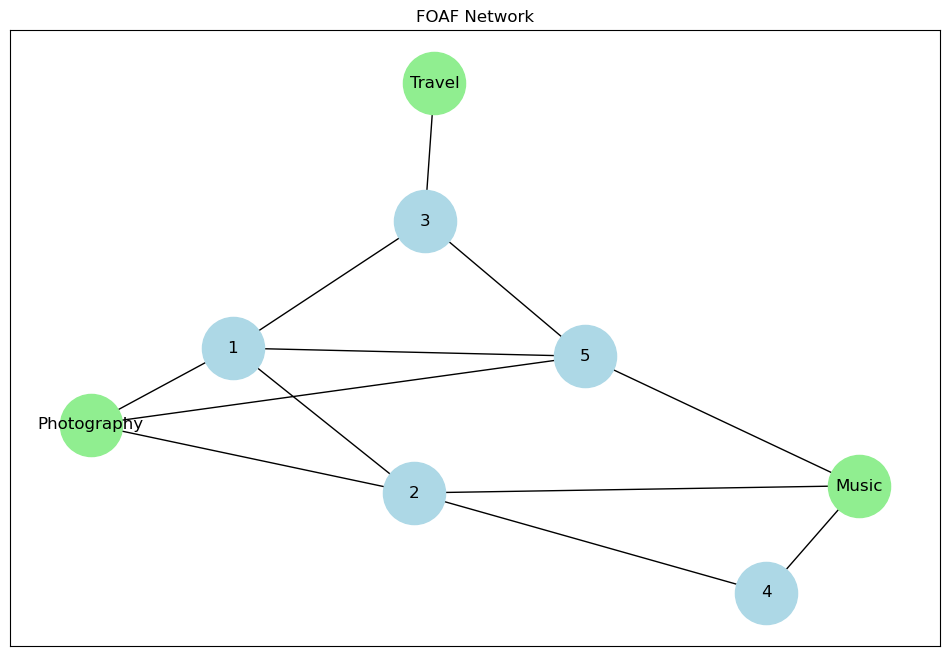

Recommendations for User 1: [2, 3, 5, 'Photography']
Recommendations for User 2: ['Music', 4, 'Photography', 1]
Recommendations for User 3: [1, 5]
Recommendations for User 4: ['Music', 2]
Recommendations for User 5: [3, 'Photography', 1]


In [8]:
G = nx.Graph()

# Function to add users and friendships to the graph
def add_user(user_id, username):
    G.add_node(user_id, username=username, type="user")

def add_friendship(user1_id, user2_id):
    G.add_edge(user1_id, user2_id)

# Add interests as nodes to the graph
interests = ["Photography", "Music", "Travel"]
for interest in interests:
    G.add_node(interest, type="interest")

# Connect users to their interests (based on your example data)
G.add_edge(1, "Photography")
G.add_edge(2, "Photography")
G.add_edge(2, "Music")
G.add_edge(3, "Travel")
G.add_edge(4, "Music")
G.add_edge(5, "Music")
G.add_edge(5, "Photography")

# Example users and friendships
users = [
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "David"),
    (5, "Eve")
]

friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

# Add users and friendships to the graph
for user_id, username in users:
    add_user(user_id, username)

for user1_id, user2_id in friendships:
    add_friendship(user1_id, user2_id)

# Simple recommendation algorithm
def simple_recommendation(user_id):
    recommendations = []
    user_friends = set(G.neighbors(user_id))
    user_interests = set(G.neighbors(user_id))
    for friend in user_friends:
        friend_friends = set(G.neighbors(friend))
        shared_friends = user_friends.intersection(friend_friends)
        if len(shared_friends) > 0 and friend != user_id:  # Skip recommending the user itself
            recommendations.append(friend)
    return recommendations

# Draw the graph
pos = nx.spring_layout(G)
user_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'user']
interest_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'interest']
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=interest_nodes, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("FOAF Network")
plt.show()

# Example usage of the recommendation algorithm
for user_id, _ in users:
    recommendations = simple_recommendation(user_id)
    print(f"Recommendations for User {user_id}: {recommendations}")

In [12]:
g=nx.read_edgelist('data/train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

AttributeError: module 'networkx' has no attribute 'info'

In [30]:
def calculate_weight(user_id, potential_recommendation_id, G):
    common_friends = len(set(G.neighbors(user_id)).intersection(set(G.neighbors(potential_recommendation_id))))
    shared_interests = len(set(G.neighbors(user_id)).intersection(set(G.neighbors(potential_recommendation_id))))
    return common_friends + shared_interests

def simple_recommendation_with_weights(G):
    recommendations = {}
    for user_id in G.nodes():
        recommendations[user_id] = []
        user_friends = set(G.neighbors(user_id))
        user_interests = set(G.neighbors(user_id))
        for potential_recommendation_id in G.nodes():
            if (
                G.nodes[potential_recommendation_id].get('type') == 'user' and  # Check if the node is a user
                potential_recommendation_id != user_id and 
                potential_recommendation_id not in user_friends
            ):
                potential_recommendation_interests = set(G.neighbors(potential_recommendation_id))
                shared_interests = len(user_interests.intersection(potential_recommendation_interests))
                if shared_interests > 0:  # Only recommend if there are shared interests
                    weight = calculate_weight(user_id, potential_recommendation_id, G)
                    recommendations[user_id].append((potential_recommendation_id, weight))
        recommendations[user_id].sort(key=lambda x: x[1], reverse=True)  # Sort recommendations by weight
    return recommendations

# Example usage
recommendations = simple_recommendation_with_weights(G)
print("Recommendations:")
for user_id, user_recommendations in recommendations.items():
    print(f"User {user_id}:")
    for recommendation, weight in user_recommendations:
        print(f"   - User {recommendation}: Weight = {weight}")


Recommendations:
User Photography:
   - User 3: Weight = 4
   - User 4: Weight = 2
User Music:
   - User 1: Weight = 4
   - User 3: Weight = 2
User Travel:
   - User 1: Weight = 2
   - User 5: Weight = 2
User 1:
   - User 4: Weight = 2
User 2:
   - User 5: Weight = 6
   - User 3: Weight = 2
User 3:
   - User 2: Weight = 2
User 4:
   - User 1: Weight = 2
   - User 5: Weight = 2
User 5:
   - User 2: Weight = 6
   - User 4: Weight = 2


In [8]:
testId = [1,2,3,4]
testDict = {1:[2],
            2:[1,3],
            3:[4],
            4:[2]
}

for i in testDict.keys():
    print(str(i) + " connait " + str(testDict[i]))

1 connait [2]
2 connait [1, 3]
3 connait [4]
4 connait [2]


# MIT CODE

In [2]:
import networkx as nx
import random

# Create an "empty" graph
G = nx.Graph()

# Add nodes to the graph
G.add_node("A")
G.add_node("B")
G.add_node("C")
# TODO: Add nodes D and E
# Code goes here


# Add edges to the graph
G.add_edge("A", "C")
G.add_edge("B", "C")
# TODO: Add edges CD, DA and BE
# Code goes here

In [3]:
def friends(graph, user):
    """Returns a set of the friends of the given user, in the given graph"""
    return set(graph.neighbors(user))


def friends_of_friends(graph, user):
    """Returns a set of friends of friends of the given user, in the given graph.
    The result does not include the given user nor any of that user's friends.
    """
    user_friends = friends(graph, user)
    user_friends_of_friends = set()

    for friend in user_friends:
        user_friends_of_friends.update(friends(graph, friend) - user_friends)

    return user_friends_of_friends - {user}


def common_friends(graph, user1, user2):
    """Returns the set of friends that user1 and user2 have in common."""
    return friends(graph, user1).intersection(friends(graph, user2))


def number_of_common_friends_map(graph, user):
    """Returns a map from each user U to the number of friends U has in common with the given user.
    The map keys are the users who have at least one friend in common with the
    given user, and are neither the given user nor one of the given user's friends.
    Take a graph G for example:
        - A and B have two friends in common
        - A and C have one friend in common
        - A and D have one friend in common
        - A and E have no friends in common
        - A is friends with D
    number_of_common_friends_map(G, "A")  =>   { 'B':2, 'C':1 }
    """
    common_friends_map = {}
    user_friends = friends_of_friends(graph, user)

    for friend in user_friends:
        length = len(common_friends(graph, user, friend))
        if length >= 1:
            common_friends_map[friend] = length

    return common_friends_map


def number_map_to_sorted_list(friend_map):
    """Given a map whose values are numbers, return a list of the keys.
    The keys are sorted by the number they map to, from greatest to least.
    When two keys map to the same number, the keys are sorted by their
    natural sort order, from least to greatest.
    """
    return [v[0] for v in sorted(friend_map.items(), key=lambda kv: (-kv[1], kv[0]))]


def recommend_by_number_of_common_friends(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the number of common friends.
    """
    return number_map_to_sorted_list(number_of_common_friends_map(graph, user))


def influence_map(graph, user):
    """Returns a map from each user U to the friend influence, with respect to the given user.
    The map only contains users who have at least one friend in common with U,
    and are neither U nor one of U's friends.
    See the assignment for the definition of friend influence.
    """
    user_friends_of_friends = friends_of_friends(graph, user)
    friend_influence_map = {}

    for friend in user_friends_of_friends:
        user_common_friends = common_friends(graph, user, friend)
        if len(user_common_friends) >= 1:
            friend_influence_map[friend] = sum(
                [1 / len(friends(graph, val)) for val in user_common_friends]
            )

    return friend_influence_map


def recommend_by_influence(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the influence measurement.
    """
    return number_map_to_sorted_list(influence_map(graph, user))

In [5]:
from recommendation import recommend_by_influence as rif
from recommendation import recommend_by_number_of_common_friends as rcf
from recommendation import number_of_common_friends_map

CHARACTERS = [
    "Nurse",
    "Juliet",
    "Capulet",
    "Tybalt",
    "Friar Laurence",
    "Romeo",
    "Benvolio",
    "Montague",
    "Escalus",
    "Mercutio",
    "Paris",
]

RELATIONSHIPS = [
    ("Nurse", "Juliet"),
    ("Juliet", "Tybalt"),
    ("Juliet", "Friar Laurence"),
    ("Juliet", "Romeo"),
    ("Juliet", "Capulet"),
    ("Capulet", "Tybalt"),
    ("Capulet", "Escalus"),
    ("Capulet", "Paris"),
    ("Romeo", "Friar Laurence"),
    ("Romeo", "Benvolio"),
    ("Romeo", "Montague"),
    ("Romeo", "Mercutio"),
    ("Benvolio", "Montague"),
    ("Montague", "Escalus"),
    ("Escalus", "Mercutio"),
    ("Escalus", "Paris"),
    ("Mercutio", "Paris"),
]

ALGORITHMS = ["recommend_by_number_of_common_friends", "recommend_by_influence"]


def algorithm_difference(graph, nodes, results_filename):
    """Identify if the algorithm results are different."""
    same = 0
    different = 0

    with open(results_filename, "w") as file:
        for node in nodes:

            print(number_of_common_friends_map(graph, node))
            
            if rcf(graph, node) == rif(graph, node):
                same += 1
                file.write("Same\n")
            else:
                different += 1
                file.write("Different\n")

        file.write("\n")
        file.write(f"Same: {same}\n")
        file.write(f"Different: {different}\n")


def average_ranking(user1, user2, user1_recommendations, user2_recommendations):
    """Return the average ranking of two users from their recommendations."""

    if user1 in user2_recommendations and user2 in user1_recommendations:
        user1_rank = user2_recommendations.index(user1) + 1
        user2_rank = user1_recommendations.index(user2) + 1
        return (user1_rank + user2_rank) / 2

    return None


def get_user_recommendations(graph, user, algorithm):
    """Return user recommendations based on algorithm."""

    if algorithm == ALGORITHMS[0]:
        return rcf(graph, user)

    return rif(graph, user)


def algorithms_average(graph, user1, user2):
    """Return recommendation algorithm average scores."""

    common_average = 0
    influence_average = 0
    for algorithm in ALGORITHMS:
        user1_recommendations = get_user_recommendations(graph, user1, algorithm)
        user2_recommendations = get_user_recommendations(graph, user2, algorithm)

        average = average_ranking(
            user1, user2, user1_recommendations, user2_recommendations
        )
        if average is None:
            return None

        if algorithm == ALGORITHMS[0]:
            common_average = average
        else:
            influence_average = average

    return {ALGORITHMS[0]: common_average, ALGORITHMS[1]: influence_average}


def compare_algorithms(graph, edges):
    """Compare algorithms and return the better one with average performace for each."""

    edge = random.choice(edges)
    user1 = edge[0]
    user2 = edge[1]
    graph.remove_edge(user1, user2)

    average_results = algorithms_average(graph, user1, user2)
    graph.add_edge(user1, user2)

    better_algorithm = None
    if not average_results:
        return better_algorithm

    common_friends_average = average_results["recommend_by_number_of_common_friends"]
    influence_average = average_results["recommend_by_influence"]

    if common_friends_average < influence_average:
        better_algorithm = ALGORITHMS[0]

    if influence_average < common_friends_average:
        better_algorithm = ALGORITHMS[1]

    return {
        "better_algorithm": better_algorithm,
        "common_friends_average": common_friends_average,
        "influence_average": influence_average,
    }


def algorithm_analysis(graph, edges, results_filename):
    """Generate a report on the results of both algorithms."""
    common_friends_algorithm = 0
    influence_algorithm = 0
    neither_algorithm = 0

    with open(results_filename, "w") as file:
        for _ in range(1, 101):
            result = compare_algorithms(graph, edges)
            if result is None:
                neither_algorithm += 1
                continue

            file.write(
                f"Average rank common friends algorithm: {result['common_friends_average']}\n"
            )
            file.write(
                f"Average rank influence algorithm: {result['influence_average']}\n"
            )

            if result["better_algorithm"] == ALGORITHMS[0]:
                common_friends_algorithm += 1
                file.write(f"Number of common friends algorithm is better\n")
            if result["better_algorithm"] == ALGORITHMS[1]:
                influence_algorithm += 1
                file.write(f"Influence algorithm is better\n")
            if result["better_algorithm"] is None:
                neither_algorithm += 1
                file.write(f"None is better\n")
            file.write("\n")

        file.write(f"Number of common friends algorithm: {common_friends_algorithm}\n")
        file.write(f"Influence algorithm: {influence_algorithm}\n")
        file.write(f"Neutral: {neither_algorithm}\n")


if __name__ == "__main__":
    rj_graph = nx.Graph()
    rj_graph.add_nodes_from(CHARACTERS)
    rj_graph.add_edges_from(RELATIONSHIPS)

    algorithm_difference(rj_graph, CHARACTERS, "results/rj_algorithm_diff.txt")
    algorithm_analysis(rj_graph, RELATIONSHIPS, "results/rj_algorithm_analysis.txt")

{'Romeo': 0.2, 'Friar Laurence': 0.5, 'Capulet': 0.25, 'Tybalt': 0.5}
{'Paris': 0.3333333333333333, 'Montague': 0.3333333333333333, 'Benvolio': 0.5, 'Escalus': 0.25, 'Mercutio': 0.3333333333333333}
{'Montague': 0.3333333333333333, 'Romeo': 0.2, 'Friar Laurence': 0.5, 'Mercutio': 0.6666666666666666, 'Nurse': 1.0}
{'Paris': 0.3333333333333333, 'Romeo': 0.2, 'Friar Laurence': 0.5, 'Escalus': 0.25, 'Nurse': 1.0}
{'Capulet': 0.25, 'Montague': 0.3333333333333333, 'Benvolio': 0.5, 'Tybalt': 0.5, 'Mercutio': 0.3333333333333333, 'Nurse': 1.0}
{'Paris': 0.3333333333333333, 'Capulet': 0.25, 'Escalus': 0.5, 'Tybalt': 0.5, 'Nurse': 1.0}
{'Friar Laurence': 0.5, 'Escalus': 0.25, 'Mercutio': 0.3333333333333333, 'Juliet': 0.2}
{'Paris': 0.3333333333333333, 'Capulet': 0.25, 'Juliet': 0.2, 'Friar Laurence': 0.5, 'Mercutio': 0.6666666666666666}
{'Benvolio': 0.5, 'Romeo': 0.4, 'Tybalt': 0.5, 'Juliet': 0.2}
{'Capulet': 0.5, 'Montague': 0.6666666666666666, 'Juliet': 0.2, 'Benvolio': 0.5, 'Friar Laurence': 0.

In [ ]:
# Tests

from recommendation import (
    common_friends,
    friends,
    friends_of_friends,
    influence_map,
    number_map_to_sorted_list,
    number_of_common_friends_map,
    recommend_by_influence,
    recommend_by_number_of_common_friends as rcf,
)

NODES = ["A", "B", "C", "D", "E", "F", "G"]

EDGES = [
    ("A", "B"),
    ("A", "G"),
    ("B", "C"),
    ("C", "D"),
    ("C", "E"),
    ("E", "D"),
    ("E", "F"),
    ("E", "G"),
]


class BaseTestCase(unittest.TestCase):
    def setUp(self):
        self.graph = nx.Graph()
        self.graph.add_nodes_from(NODES)
        self.graph.add_edges_from(EDGES)

    def test_common_friends_map(self):
        """Test if the correct common friends map is returned"""
        test_data = [
            {"input": "A", "output": {"C": 1, "E": 1}},
            {"input": "B", "output": {"D": 1, "G": 1, "E": 1}},
            {"input": "C", "output": {"G": 1, "F": 1, "A": 1}},
            {"input": "D", "output": {"G": 1, "F": 1, "B": 1}},
            {"input": "E", "output": {"A": 1, "B": 1}},
        ]
        for data in test_data:
            result = number_of_common_friends_map(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_common_friends(self):
        """ "Test if function returns correct common friends"""
        # Because the possible pairs out of the graph are many I will only test 3
        test_data = [
            {"input": ["B", "E"], "output": {"C"}},
            {"input": ["B", "G"], "output": {"A"}},
            {"input": ["D", "F"], "output": {"E"}},
        ]
        for data in test_data:
            result = common_friends(self.graph, *data["input"])
            self.assertEqual(result, data["output"])

    def test_friends_of_friends(self):
        """ "Test if the correct friends of friends are returned"""
        test_data = [
            {"input": "A", "output": {"C", "E"}},
            {"input": "B", "output": {"D", "E", "G"}},
            {"input": "C", "output": {"A", "G", "F"}},
            {"input": "D", "output": {"B", "G", "F"}},
            {"input": "E", "output": {"A", "B"}},
            {"input": "F", "output": {"C", "D", "G"}},
        ]
        for data in test_data:
            result = friends_of_friends(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_friends(self):
        """Test whether the friends function returns the correct output"""
        test_data = [
            {"input": "A", "output": {"B", "G"}},
            {"input": "B", "output": {"A", "C"}},
            {"input": "C", "output": {"B", "D", "E"}},
            {"input": "D", "output": {"C", "E"}},
            {"input": "E", "output": {"G", "F", "C", "D"}},
            {"input": "F", "output": {"E"}},
        ]
        for data in test_data:
            result = friends(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_influence_map(self):
        """ "Test influence map function is returning correct results"""
        self.assertEqual(influence_map(self.graph, "A"), {"E": 0.5, "C": 0.5})
        self.assertEqual(
            influence_map(self.graph, "B"), {"G": 0.5, "E": 1 / 3, "D": 1 / 3}
        )

    def test_influence_recommendation(self):
        """ "Test influence recommendation"""
        self.assertEqual(recommend_by_influence(self.graph, "A"), ["C", "E"])
        self.assertEqual(recommend_by_influence(self.graph, "B"), ["G", "D", "E"])

    def test_sort_map_to_list(self):
        """Test that the function sorts a dictionary and returns a list"""
        self.assertEqual(number_map_to_sorted_list({"A": 2, "H": 3}), ["H", "A"])

    def test_common_friend_recommendation(self):
        """Test common friend recommendation"""
        self.assertEqual(rcf(self.graph, "A"), ["C", "E"])
        self.assertEqual(rcf(self.graph, "E"), ["A", "B"])